# Breast Cancer DataSet
# Visualizations of the data

### https://seaborn.pydata.org/


In [ ]:
#@title Do the necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
#@title Read the data from csv file
#df = pd.read_csv("breast-cancer.csv")
url = r"https://raw.githubusercontent.com/datasets/breast-cancer/refs/heads/main/data/breast-cancer.csv"
df = pd.read_csv(url)

#display the number of instances
print('Length of the dataset: ', len(df))

#display the dataframe
display(df.head())

for col in df.columns:
  print(col)

Length of the dataset:  272


,age,mefalsepause,tumor-size,inv-falsedes,falsede-caps,deg-malig,breast,breast-quad,irradiat,class
0,40-49,premefalse,15-19,0-2,True,3,right,left_up,False,recurrence-events
1,50-59,ge40,15-19,0-2,False,1,right,central,False,false-recurrence-events
2,50-59,ge40,35-39,0-2,False,2,left,left_low,False,recurrence-events
3,40-49,premefalse,35-39,0-2,True,3,right,left_low,True,false-recurrence-events
4,40-49,premefalse,30-34,3-5,True,2,left,right_up,False,recurrence-events


age
mefalsepause
tumor-size
inv-falsedes
falsede-caps
deg-malig
breast
breast-quad
irradiat
class


In [ ]:
#@title # Read the data from the URL
#https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin (not working)
#  https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
#.data contains the data
#.names contains the colum names

# Then set the following column names
'''
# Column names
1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)
'''

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
columns = ['id', 'clump_thickness', 'uniformity_of_cell_size', 'uniformity_of_cell_shape', 'marginal_adhesion', 'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']

df = pd.read_csv(url, names = columns)

#display the number of instances
print('Length of the dataset: ', len(df))

#display the dataframe
display(df.head())

for col in df.columns:
  print(col)


Length of the dataset:  699


,id,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


id
clump_thickness
uniformity_of_cell_size
uniformity_of_cell_shape
marginal_adhesion
single_epithelial_cell_size
bare_nuclei
bland_chromatin
normal_nucleoli
mitoses
class


<Axes: xlabel='class', ylabel='count'>

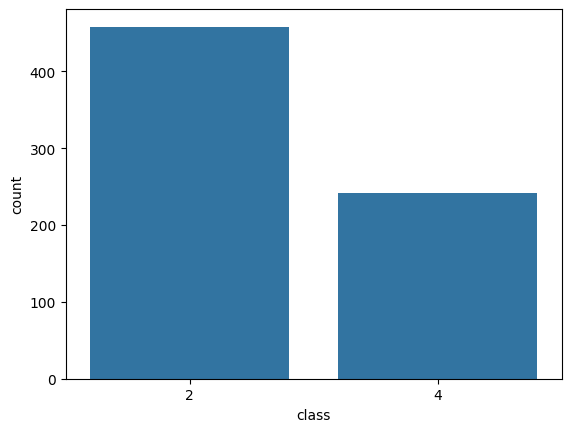

In [ ]:
#@title Visualization 1: Bar chart showing the count of classes
sns.countplot(data = df, x ='class')
# Interpretation: This plot shows the count of the classes in the dataset.
# Class 2 has a higher count compared to Class 4.


<Axes: xlabel='clump_thickness', ylabel='count'>

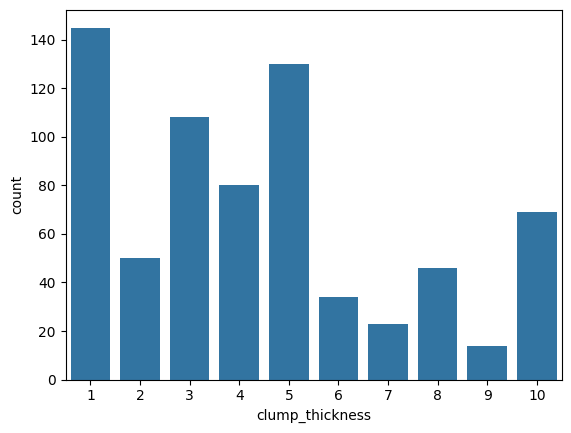

In [ ]:
sns.countplot(data = df, x ='clump_thickness')

clump_thickness_quartile
Q1    195
Q2    188
Q3    164
Q4    152
Name: count, dtype: int64


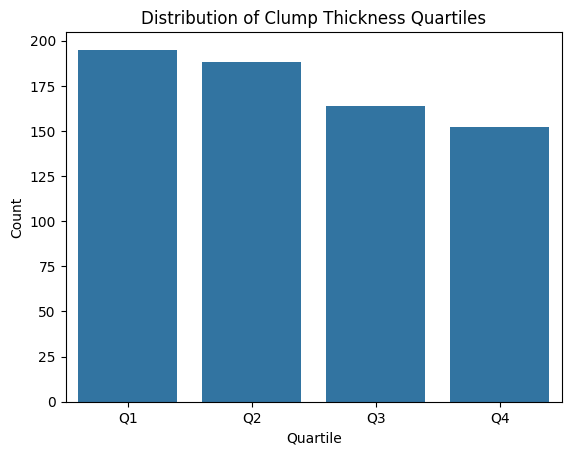

In [ ]:
#@title Visualization 2: Quartile bins for clump_thickness
# create quartile bins for 'clump_thickness'
quartiles = pd.qcut(df['clump_thickness'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# add new column with quartile labels
df['clump_thickness_quartile'] = quartiles

# check the distribution of quartile labels
print(df['clump_thickness_quartile'].value_counts())

#create bar chart
sns.countplot(x='clump_thickness_quartile', data=df)
plt.title('Distribution of Clump Thickness Quartiles')
plt.xlabel('Quartile')
plt.ylabel('Count')
plt.show()

#Interpretation: This plot shows the count of clump_thickness in each quartile


<ipython-input-12-71dfcb8d0c2f>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby(['class', bins]).size().unstack()


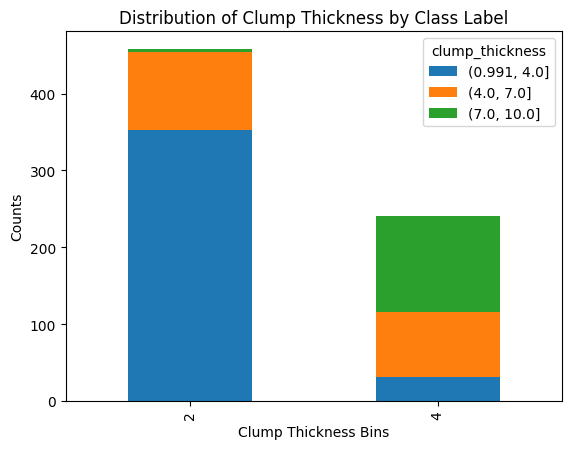

In [ ]:
#@title Visualization 3: Stacked Bar Charts

# create 5 bins of equal width for 'clump_thickness'
bins = pd.cut(df['clump_thickness'], bins = 3)

# count the number of observations in each bin for each class label
counts = df.groupby(['class', bins]).size().unstack()

# create a stacked bar chart showing the counts for each class label
counts.plot(kind='bar', stacked=True)
plt.xlabel('Clump Thickness Bins')
plt.ylabel('Counts')
plt.title('Distribution of Clump Thickness by Class Label')
plt.show()

# Interpretation: distribution of clump thickness by different bins (5) is shown in this bar chart.

<Axes: xlabel='mitoses', ylabel='Count'>

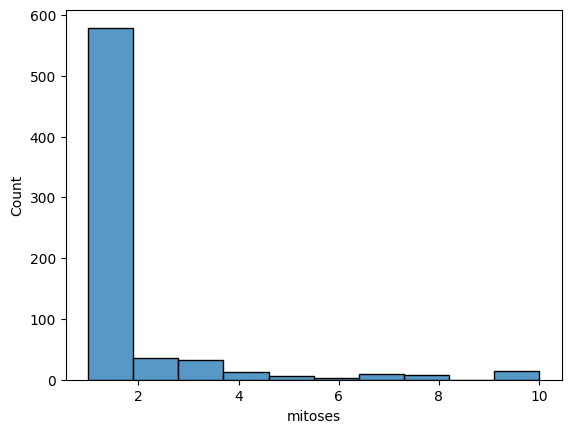

In [ ]:
#@title Visualization 4: Histogram of Mitoses
sns.histplot(data=df, x='mitoses', bins=10)
# Interpretation: This plot shows the distribution of the Mitoses feature.
# It shows that most of the values are between 0 to 2.

<Axes: ylabel='count'>

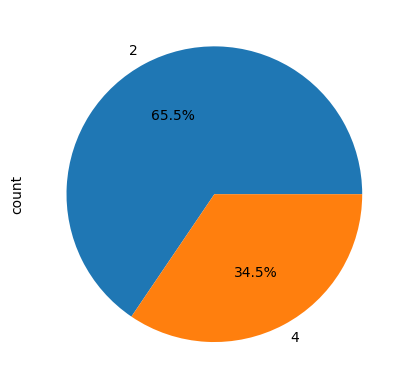

In [ ]:
#@title Visualization 5: Pie chart showing the percentage of classes
df['class'].value_counts().plot(kind='pie', autopct='%1.1f%%')
# Interpretation: This plot shows the percentage of classes in the dataset.
# Class 2 has a higher percentage compared to Class 4.

<Axes: xlabel='bare_nuclei', ylabel='count'>

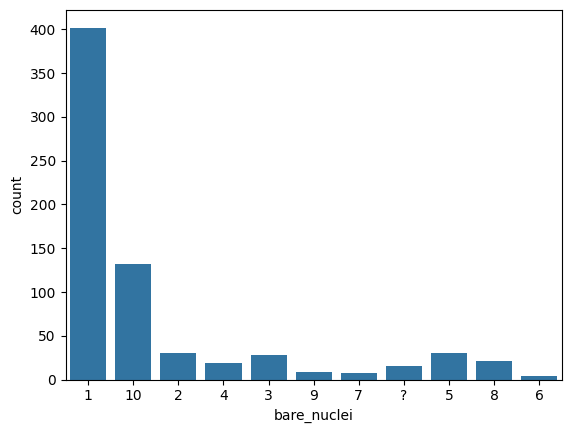

In [ ]:
#@title  Visualization 6: Bar chart showing the count of Bare nuclei
sns.countplot(data=df, x='bare_nuclei')
# Interpretation: This plot shows the count of each value in the Bare nuclei feature.
# Value 1 has a higher count compared to other values.

<Axes: xlabel='uniformity_of_cell_shape', ylabel='Count'>

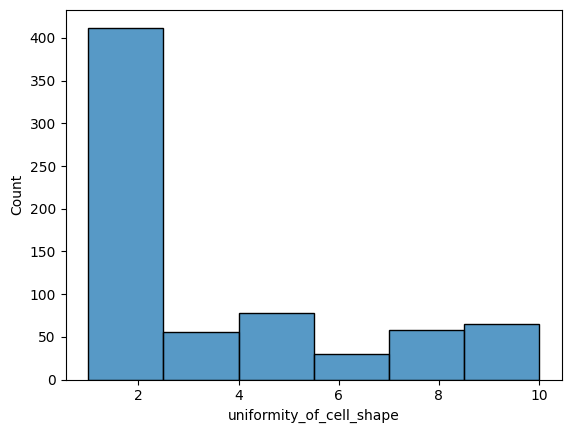

In [ ]:
#@title Visualization 7: Histogram of Uniformity of cell shape
sns.histplot(data=df, x='uniformity_of_cell_shape', bins=6)
# Interpretation: This plot shows the distribution of the Uniformity of cell shape feature. It shows that most of the values are between 1 to 6.


In [ ]:
#@title  Visualization 8: Correlation heatmap
df.info()
#df.drop(['bare_nuclei'], axis=1, inplace=True)
df.drop(['clump_thickness_quartile'], axis=1, inplace=True)

df.info()
#sns.heatmap(df.corr(), annot=True)
sns.heatmap(df.corr())
# Interpretation: This plot shows the correlation between different columns in the dataset.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           699 non-null    int64   
 1   clump_thickness              699 non-null    int64   
 2   uniformity_of_cell_size      699 non-null    int64   
 3   uniformity_of_cell_shape     699 non-null    int64   
 4   marginal_adhesion            699 non-null    int64   
 5   single_epithelial_cell_size  699 non-null    int64   
 6   bare_nuclei                  699 non-null    object  
 7   bland_chromatin              699 non-null    int64   
 8   normal_nucleoli              699 non-null    int64   
 9   mitoses                      699 non-null    int64   
 10  class                        699 non-null    int64   
 11  clump_thickness_quartile     699 non-null    category
dtypes: category(1), int64(10), object(1)
memory usage: 61.1+ KB
<cla

ValueError: could not convert string to float: '?'

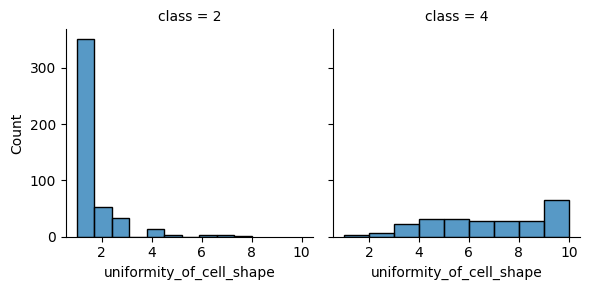

In [ ]:
#@title Visualization 9: FacetGrid
# g = sns.FacetGrid(df, col='class')
# g.map(sns.histplot, 'clump_thickness')
g = sns.FacetGrid(df, col='class')
g.map(sns.histplot, 'uniformity_of_cell_shape')
plt.show()
# Interpretation: This plot shows the relationship between 'clump_thickness' and 'class'.

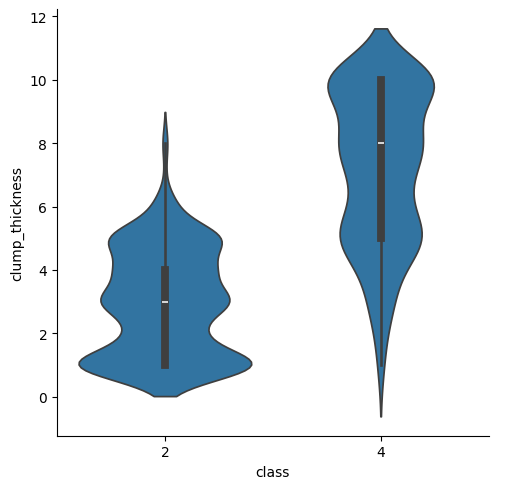

In [ ]:
#@title Visualization 10: Catplot
sns.catplot(x='class', y='clump_thickness', data=df, kind='violin')
plt.show()
#Interpretation: This plot compares the distribution of a numerical variable ('clump_thickness') between two categorical groups ('benign' and 'malignant').

<Axes: xlabel='clump_thickness', ylabel='uniformity_of_cell_size'>

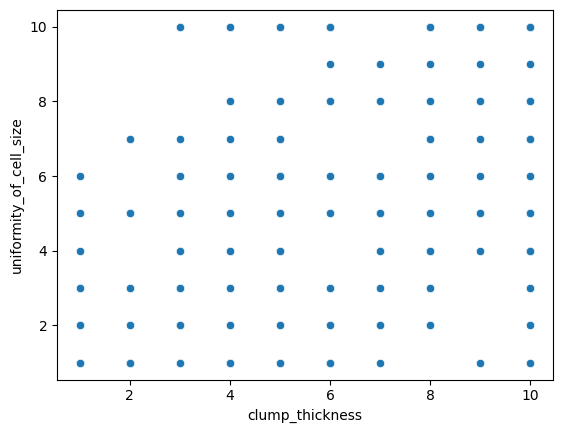

In [ ]:
#@title Visualization 11: Scatter plot between Clump thickness and Uniformity of cell size
sns.scatterplot(data=df, x='clump_thickness', y='uniformity_of_cell_size')
# Interpretation: This plot shows the relationship between Clump thickness and Uniformity of cell size.
# As the Clump thickness and Uniformity of cell size increase, the dots move up and to the right on the plot.


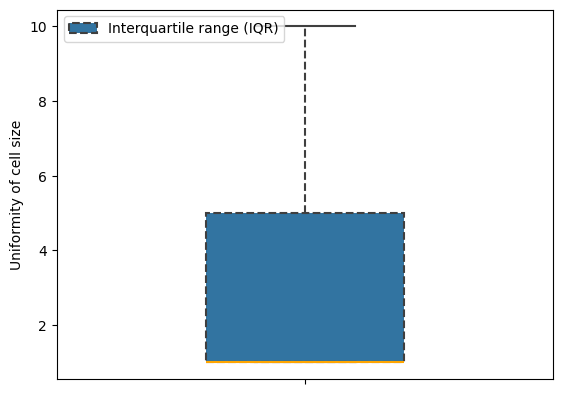

In [ ]:
#@title Visualization 12: Boxplot of Uniformity of cell size
sns.boxplot(data=df, y='uniformity_of_cell_size',
            orient='v',
            linewidth=1,
            width=0.4,
            fliersize=3,
            notch=False,
            showfliers=True,
            boxprops=dict(linestyle='--', linewidth=1.5),
            whiskerprops=dict(linestyle='--', linewidth=1.5),
            medianprops=dict(linestyle='-', linewidth=1.5, color='orange'),
            capprops=dict(linestyle='-', linewidth=1.5),
            meanprops=dict(marker='D', markeredgecolor='black', markerfacecolor='white', markersize=5),
            )
plt.ylabel('Uniformity of cell size')
plt.legend(labels=['Interquartile range (IQR)', 'Median'], loc='upper left')
# Interpretation: This plot shows the distribution of the Uniformity of cell size feature.
# It shows the median, quartiles, and outliers of the feature in a vertical orientation.
# The legend shows the IQRs and median. Whiskers are shown on both sides of the box plot.



<Axes: >

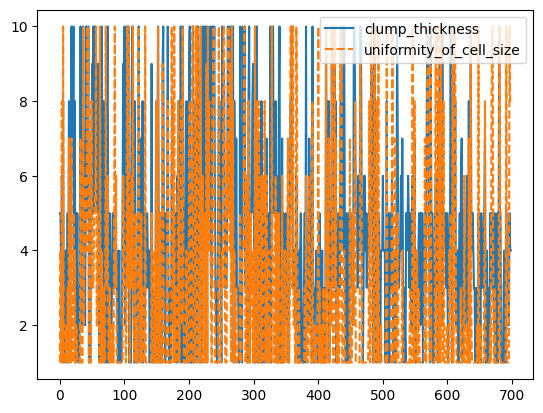

In [ ]:
#@title Visualization 13: Line plot of Clump thickness and Uniformity of cell size
sns.lineplot(data=df[['clump_thickness', 'uniformity_of_cell_size']])
# Interpretation: This plot shows the trend between Clump thickness and Uniformity of cell size over the dataset.


In [ ]:
#@title Visualization 14: Scatter plot between Clump thickness and Marginal adhesion
sns.scatterplot(data=df, x='clump_thickness', y='marginal_adhesion')
#Interpretation: This plot shows the relationship between Clump thickness and Marginal adhesion.
# As the Clump thickness and Marginal adhesion increase, the dots move up and to the right on the plot.


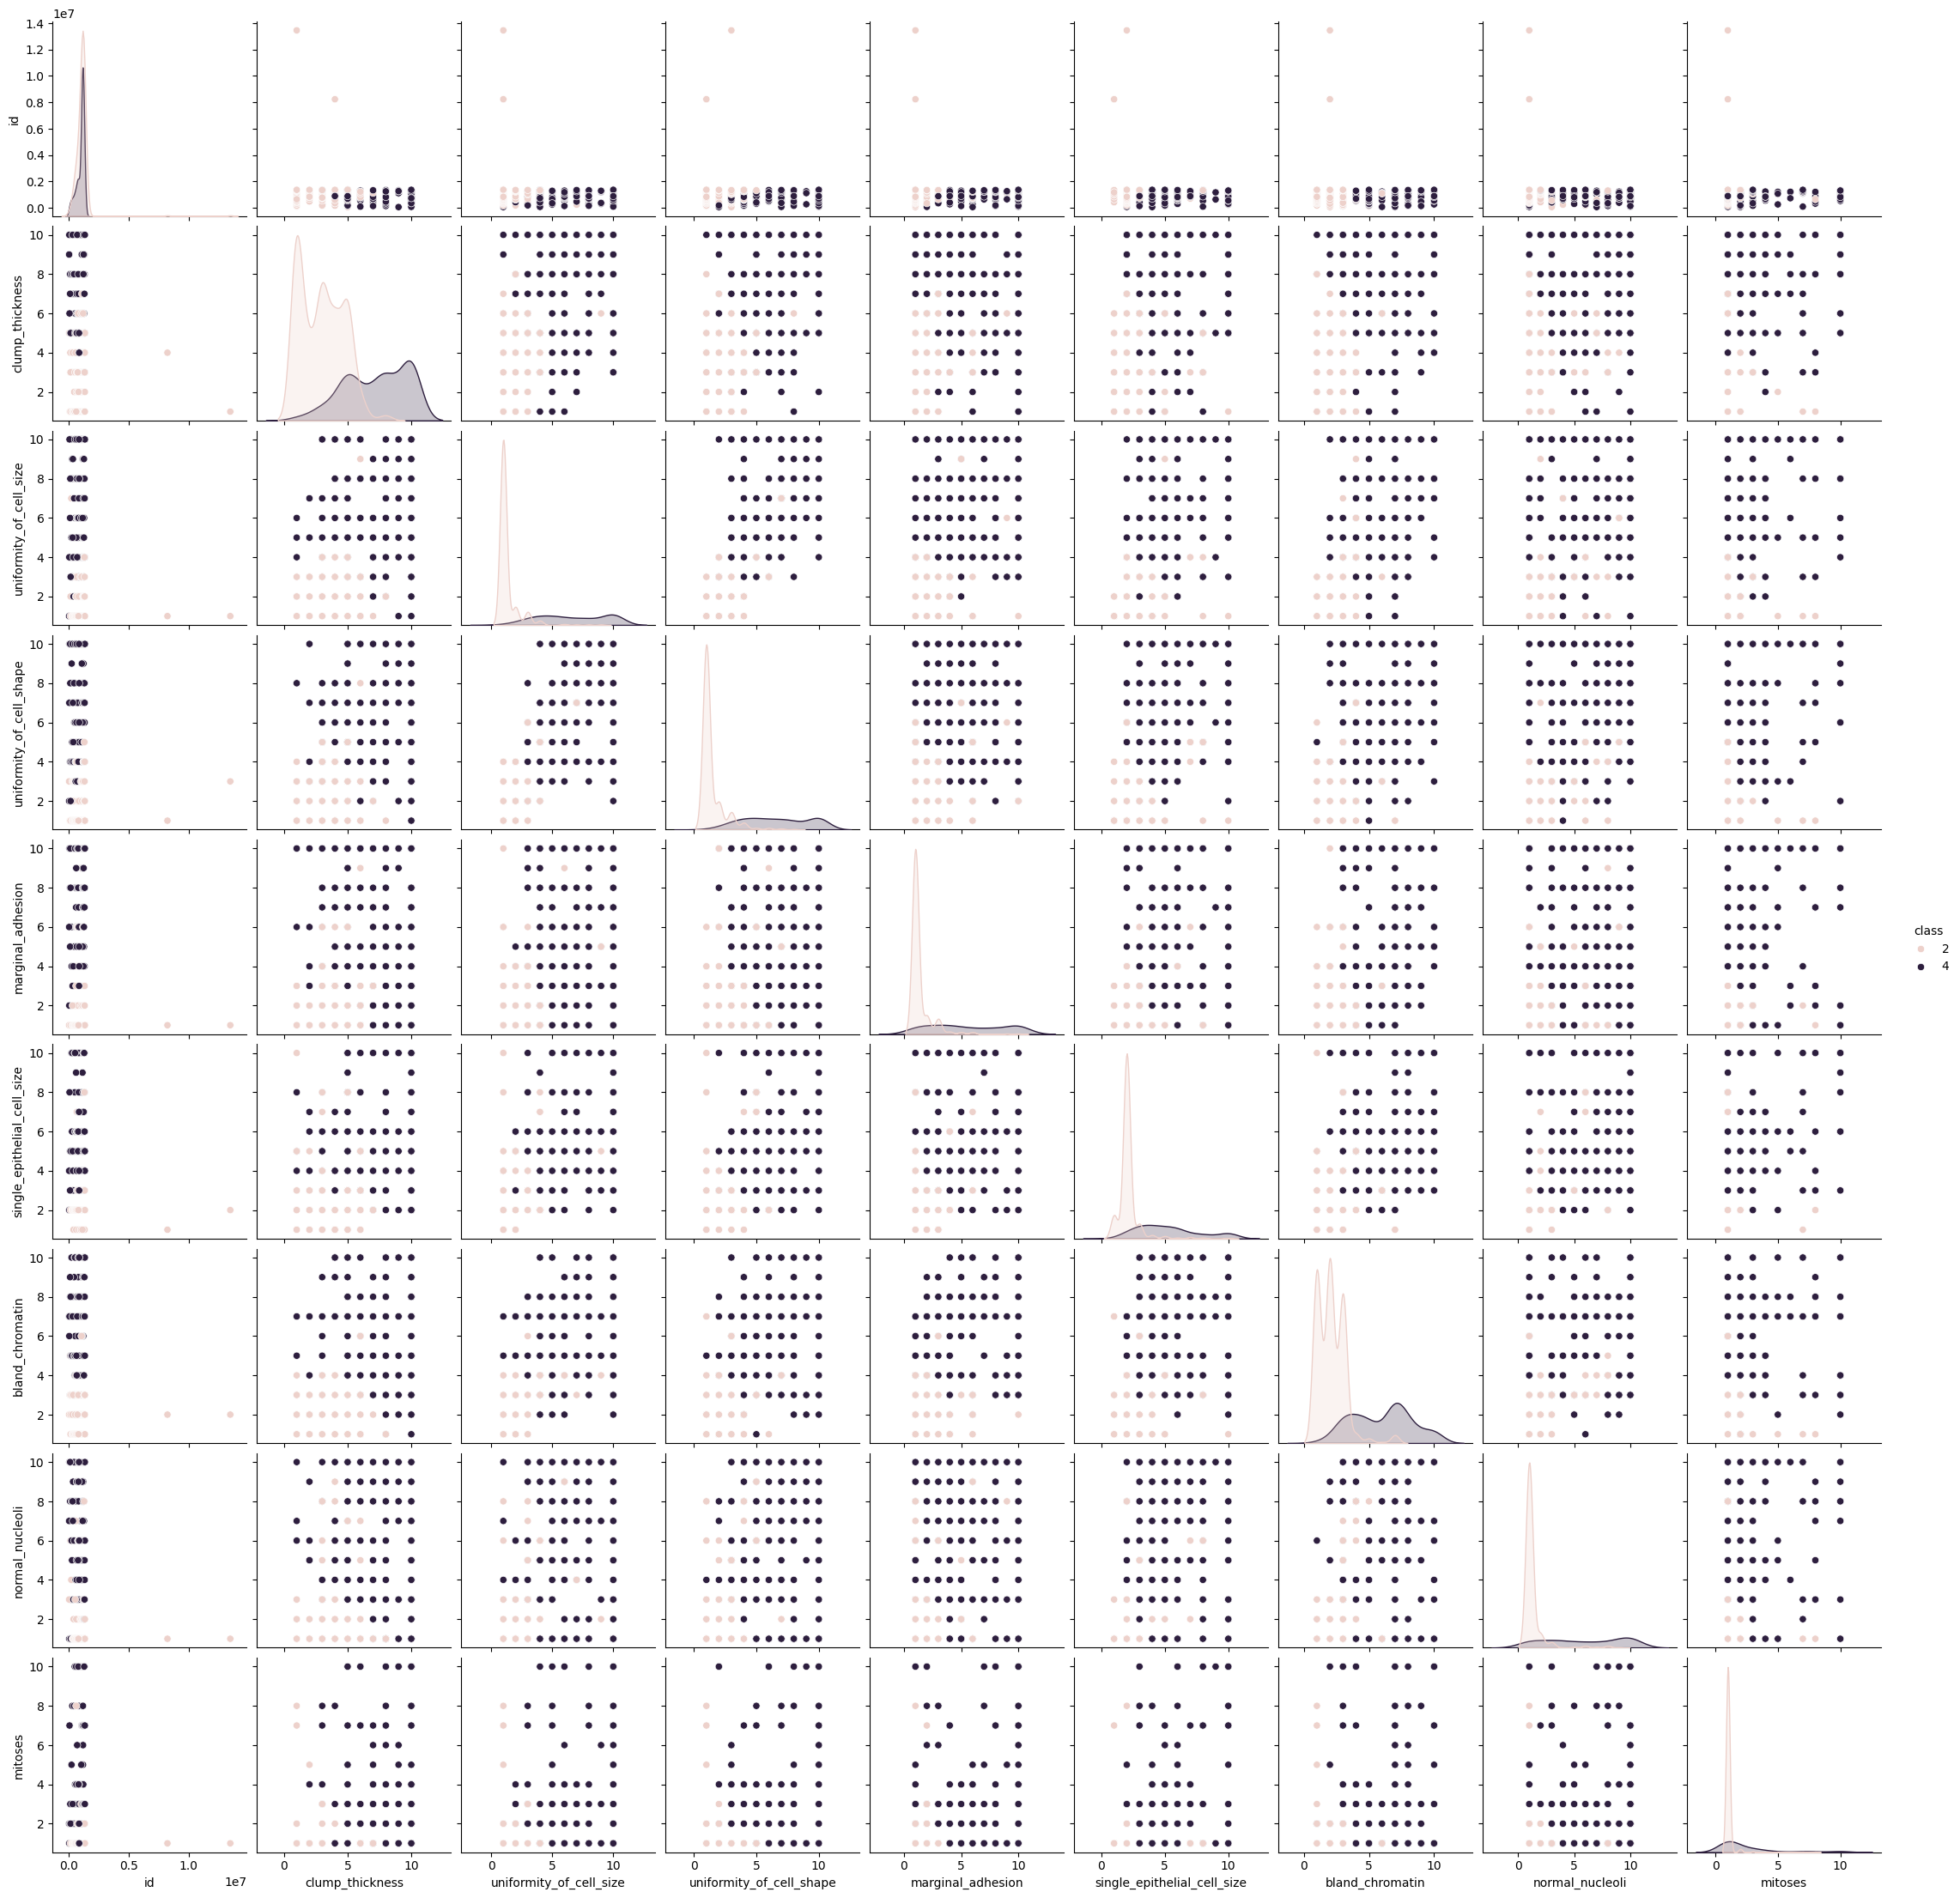

In [ ]:
#@title Visualization 15: Pairplot
sns.pairplot(df, hue='class')
# Interpretation: This plot shows pairwise relationships between different columns in the dataset.


In [ ]:
#@title Visualization 16: Clustermap
# sns.clustermap(corr, cmap='coolwarm')
# plt.show()

NameError: name 'corr' is not defined

<Axes: xlabel='class', ylabel='clump_thickness'>

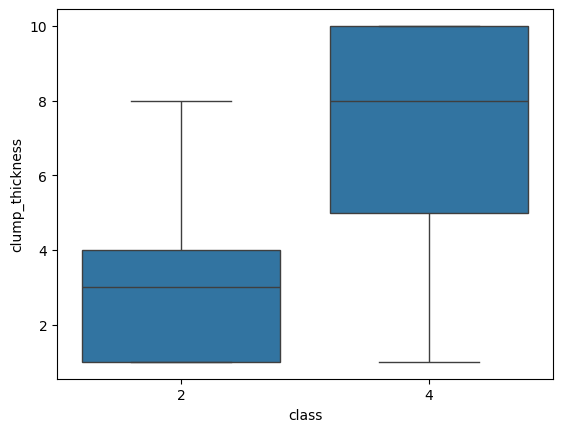

In [ ]:
#@title Visualization 17: Boxplot of 'clump_thickness' by 'class'
sns.boxplot(x='class', y='clump_thickness', data=df)
# Interpretation: This plot shows the distribution of 'clump_thickness' for each value of 'class'.


<Axes: xlabel='class', ylabel='uniformity_of_cell_size'>

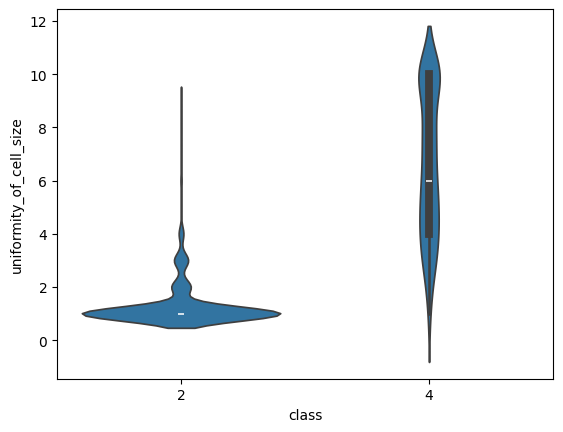

In [ ]:
#@title Visualization 18: Violinplot of 'uniformity_of_cell_size' by 'class'
sns.violinplot(x='class', y='uniformity_of_cell_size', data=df)
# Interpretation: This plot shows the distribution of 'uniformity_of_cell_size' for each value of 'class'.


<Axes: xlabel='class', ylabel='marginal_adhesion'>

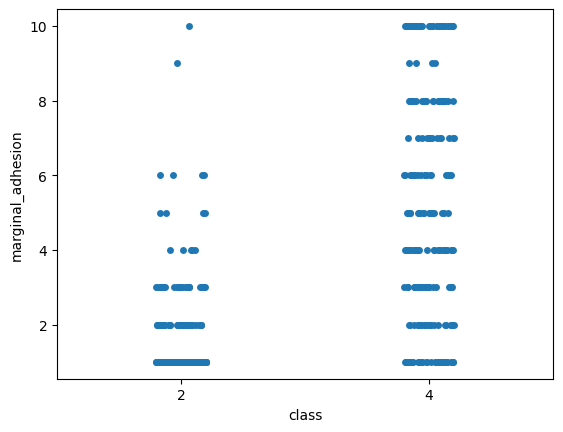

In [ ]:
#@title Visualization 19: strip plot of 'marginal_adhesion' by 'class'
sns.stripplot(x='class', y='marginal_adhesion', data=df)
# Interpretation: This plot shows the distribution of 'marginal_adhesion' for each value of 'class'.



<Axes: xlabel='class', ylabel='clump_thickness'>

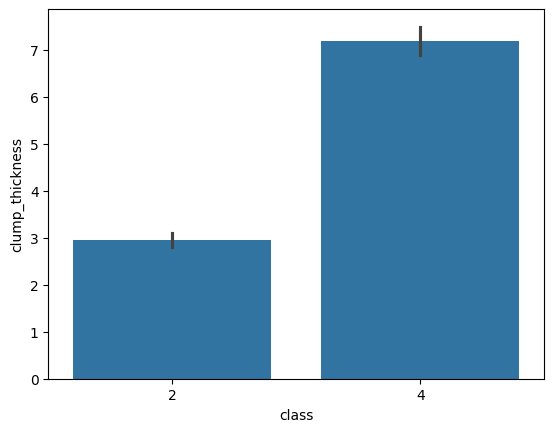

In [ ]:
#@title Visualization 20: Barplot of mean 'clump_thickness' by 'class'
sns.barplot(x='class', y='clump_thickness', data=df, estimator=lambda x: sum(x)/len(x))
# Interpretation: This plot shows the mean 'clump_thickness' for each value of 'class'.


In [ ]:
#@title Visualization 21: Pointplot of 'mitoses' by 'class'
sns.pointplot(x='class', y='mitoses', data=df)
# Interpretation: This plot shows the relationship between 'mitoses' and 'class'.

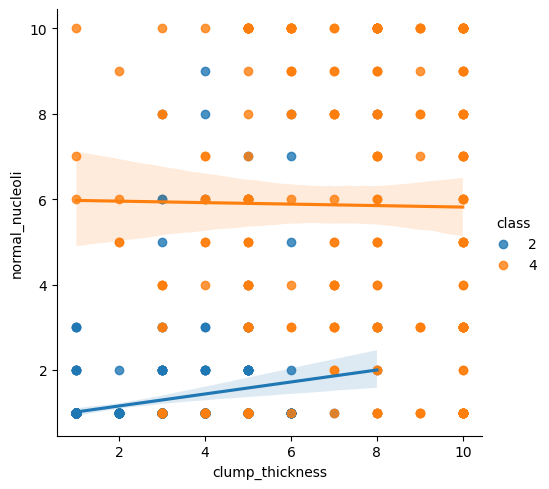

In [ ]:
#@title Visualization 22: lmplot
sns.lmplot(x='clump_thickness', y='normal_nucleoli', data=df, hue='class')
plt.show()
# Interpretation: This plot gives insight into the relationship between two variables and how that relationship may differ depending on the class label.

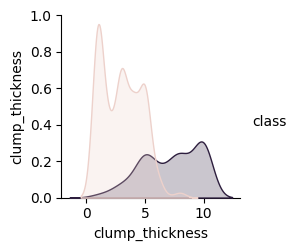

In [ ]:
#@title Visualization 23: Catplot Pairwise Scatterplots
sns.pairplot(df, hue='class', vars=['clump_thickness'])
plt.show()
# interpretation: Shows the plot of clump_thickness against the two classes.


# Other Visualizations in seaborn

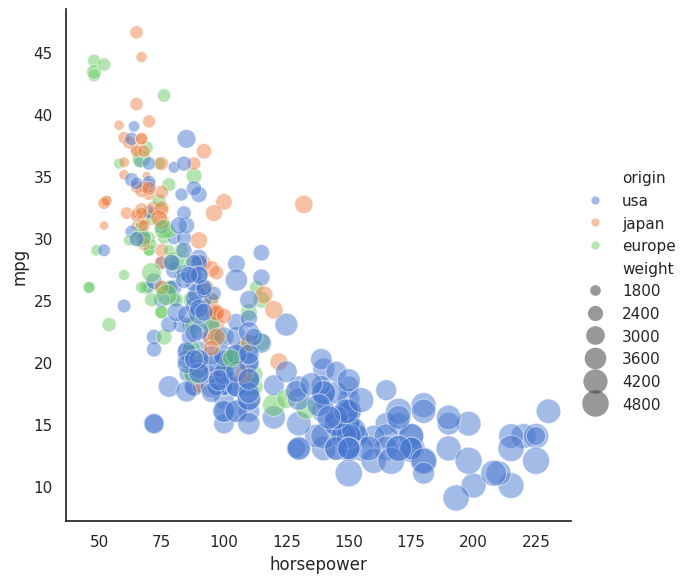

In [ ]:
#@title relplot
import seaborn as sns
sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg)

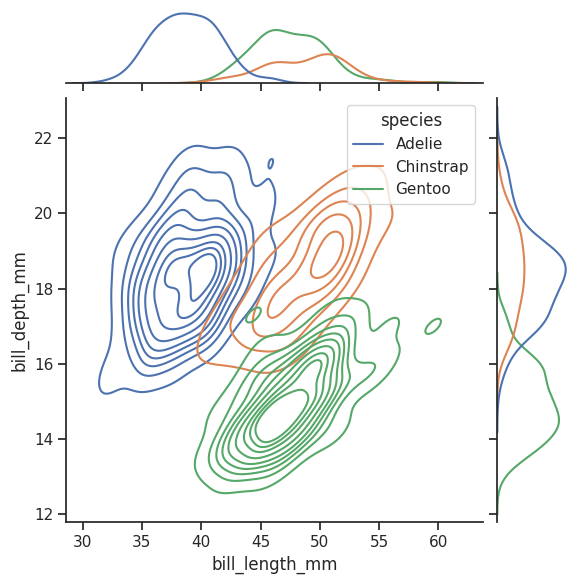

In [ ]:
#@title jointplot using KDE
import seaborn as sns
sns.set_theme(style="ticks")

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde",
)

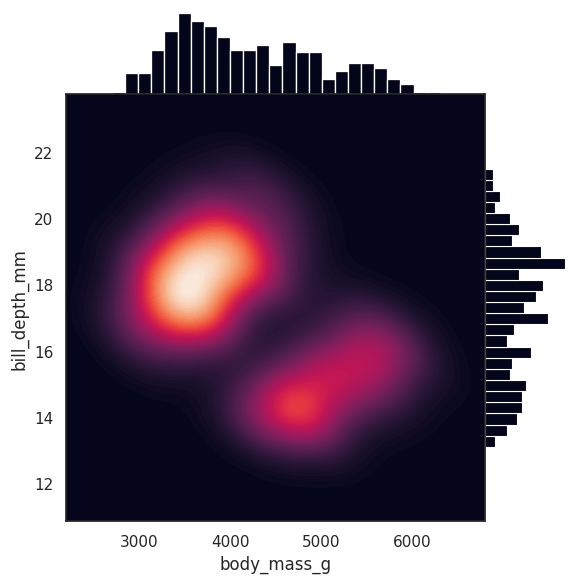

In [ ]:
#@title JointGrid
import seaborn as sns
sns.set_theme(style="white")

df = sns.load_dataset("penguins")

g = sns.JointGrid(data=df, x="body_mass_g", y="bill_depth_mm", space=0)
g.plot_joint(sns.kdeplot,
             fill=True, clip=((2200, 6800), (10, 25)),
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)

#Analysis of Heatmaps

a step-by-step process for selecting independent variables along with justifications and descriptions of their relationships:

Review the Heat Map: The heat map displays the correlation between independent variables and the dependent variable. It helps identify which independent variables are strongly correlated (positively or negatively) with the dependent variable.

Selection of Independent Variables: Look for independent variables with significant correlations with the dependent variable. These variables should ideally have correlation coefficients above a certain threshold (e.g., 0.3 or -0.3).

Justification of Selection:

a. Correlation Strength: Choose independent variables with strong correlations with the dependent variable. Strong correlations indicate a meaningful relationship that can potentially impact the dependent variable.

b. Relevance: Select independent variables that are theoretically or intuitively relevant to the dependent variable. Variables that directly influence or are influenced by the dependent variable are typically more relevant.

c. Statistical Significance: Ensure that selected independent variables have statistically significant correlations with the dependent variable. Statistical significance can be determined through p-values or confidence intervals.

d. Avoid Multicollinearity: Be cautious of selecting independent variables that are highly correlated with each other (multicollinearity). High multicollinearity can distort regression results and make interpretation difficult.

Description of Relationship:

a. Positive Relationship: If the correlation coefficient is positive, it indicates that as the independent variable increases, the dependent variable also tends to increase. For example, if the independent variable is "income" and the dependent variable is "spending," a positive correlation suggests that higher income is associated with higher spending.

b. Negative Relationship: If the correlation coefficient is negative, it suggests that as the independent variable increases, the dependent variable tends to decrease. For instance, if the independent variable is "interest rates" and the dependent variable is "investment," a negative correlation implies that higher interest rates are associated with lower investment.

c. No Significant Relationship: If the correlation coefficient is close to zero, it indicates a weak or no linear relationship between the independent and dependent variables.

Documentation: Document the rationale behind the selection of independent variables, including their correlations, significance, and the nature of their relationships with the dependent variable.

By following these steps, you can effectively select independent variables based on their correlation with the dependent variable and provide justifications along with descriptions of their relationships.